In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


1.** Viewing the dataset.**

In [2]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')


In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [5]:
#Setting up row ID as the index
df.set_index("Row ID", inplace=True)

In [6]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [7]:
#To find out the null values
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df["Postal Code"]=df["Postal Code"].fillna(df["Postal Code"]).mean()

In [9]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [11]:
df.dtypes


Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [12]:
# Add a seperate column year to the table
df["Order Date"]=pd.to_datetime(df["Order Date"], format='%d/%m/%Y')
df["Year"]=df["Order Date"].dt.year

In [13]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,55273.322403,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017
2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,55273.322403,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017
3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,55273.322403,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017


In [14]:
print(df["Year"].max())
print(df["Year"].min())

2018
2015


In [15]:
#Grouping the sales with year and creating it in a new dataframe
df_SY=df.groupby("Year")["Sales"].mean().reset_index()
df_SY

,Year,Sales
0,2015,245.702103
1,2016,223.569832
2,2017,236.855781
3,2018,221.624315


Text(0.5, 1.0, 'Sales of Furniture Per year')

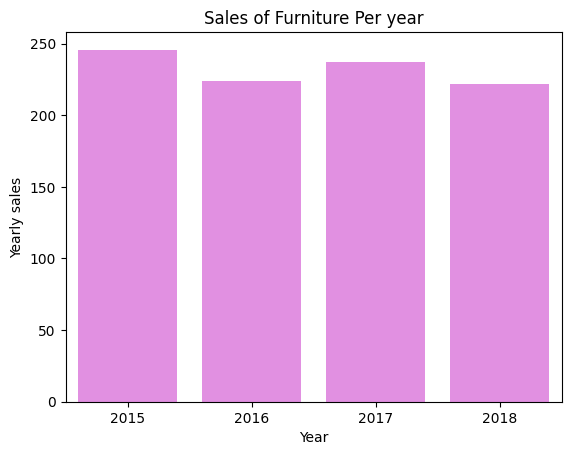

In [16]:

#To plot how much sales of furniture are done in per year
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df_SY,x="Year",y="Sales", color="violet")
plt.xlabel("Year")
plt.ylabel("Yearly sales")
plt.title("Sales of Furniture Per year")

In [17]:
#Now creating a dataframe that shows the type of furniture are selling per year
df_TYF=df.groupby(["Sub-Category"])["Sales"].mean().reset_index()
df_TYF

,Sub-Category,Sales
0,Accessories,217.178175
1,Appliances,227.926804
2,Art,34.019631
3,Binders,134.067550
4,Bookcases,503.598224
5,Chairs,531.833165
6,Copiers,2215.880212
7,Envelopes,65.032444
8,Fasteners,14.027850
9,Furnishings,95.823865


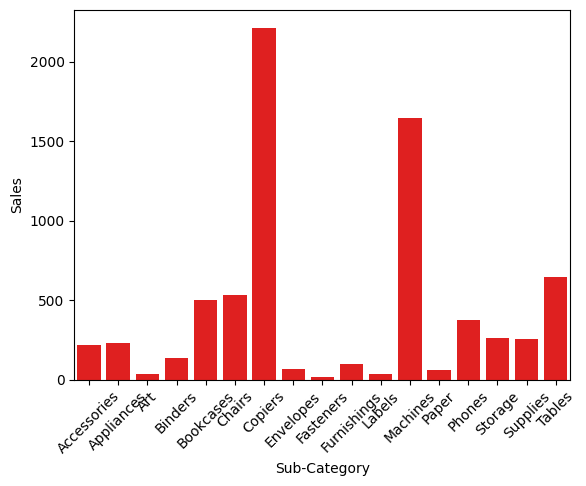

In [18]:
sns.barplot(data=df_TYF, x="Sub-Category", y="Sales", color="red")
#plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.show()

We can see that Fastners are least sold items among the other

In [19]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,55273.322403,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,55273.322403,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,55273.322403,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,55273.322403,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,55273.322403,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


In [20]:
#Now we can do a pie chart to see which country has used which type of shipmode
df_SHM=df.groupby(["Country","Ship Mode"]).size().reset_index(name="Count")
df_SHM.set_index("Country", inplace=True)
df_SHM

,Ship Mode,Count
Country,,
United States,First Class,1501
United States,Same Day,538
United States,Second Class,1902
United States,Standard Class,5859


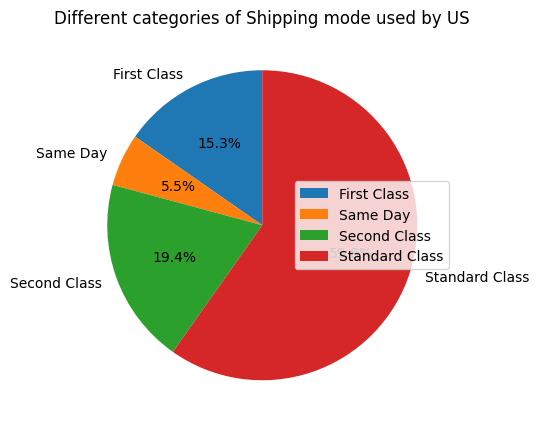

In [21]:
#Now make a Pie chart to see the variation
df_SHM["Count"].plot(kind="pie",startangle=90, figsize=(5,6),autopct='%1.1f%%', legend=True, ylabel='', labels=df_SHM["Ship Mode"])
plt.title("Different categories of Shipping mode used by US")
plt.show()

We can see that the standard class shipping mode has been used maximum by US

In [22]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,55273.322403,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017
2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,55273.322403,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017
3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,55273.322403,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017


In [23]:
#First we will drop the duplicate values
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
Row ID,,,,,,,,,,,,,,,,,,
3407,US-2015-150119,2015-04-23,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,55273.322403,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2015


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
#Which city gave the highesct sale
df_CS=df.groupby("Category")["City"].size().reset_index()
df_CS

,Category,City
0,Furniture,2077
1,Office Supplies,5909
2,Technology,1813


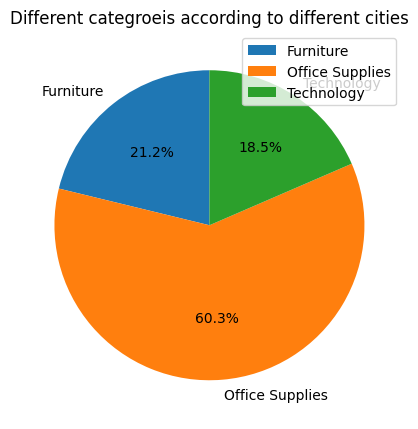

In [26]:
df_CS["City"].plot(kind="pie", startangle=90, figsize=(5,6),autopct='%1.1f%%', legend=True, ylabel='', labels=df_CS["Category"])
plt.title("Different categroeis according to different cities")
plt.show()